<a href="https://colab.research.google.com/github/fluffybird2323/Sentiment-analysis-on-Amazon-reviews-/blob/master/Sentiment_Analysis_on_Amazon_Reviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from keras.preprocessing.text import Tokenizer

t = Tokenizer(num_words=10000)

with open('Book1.csv',encoding = 'ISO-8859-1') as fin:
    for line in fin:      
        t.fit_on_texts( line.split()) # Fitting the tokenizer line-by-line.

M = []

with open('Book1.csv',encoding = 'ISO-8859-1') as fin:
    for line in fin:
        # Converting the lines into matrix, line-by-line.
        m = t.texts_to_matrix([line], mode='binary')[0]
        M.append(m)

In [0]:
import numpy as np

In [0]:
X = np.array(M)
train_size = int(len(X) * .75)
X = X[:7134]

In [0]:
X.shape

(7134, 10000)

In [0]:
X[200]

array([0., 0., 0., ..., 0., 0., 0.])

In [0]:
import csv
with open('Y.csv') as raw:
    stars = np.array(list(csv.reader(raw,delimiter=',')))
print(stars.reshape(7134,1))    

[['4']
 ['5']
 ['5']
 ...
 ['5']
 ['5']
 ['5']]


In [0]:
Y = stars 
from sklearn.utils import shuffle
X,Y = shuffle(X,Y)
Xtrain = X[:train_size]
Xtest = X[train_size:]
Ytrain = Y[:train_size] 
Ytest = Y[train_size:]

In [0]:
from keras.models import Sequential
from keras.layers import *
from keras.utils import to_categorical
Ytrain = (Ytrain.astype(np.int) -1) >=2
Ytest = (Ytest.astype(np.int) -1) >=2

In [0]:
from keras import regularizers
from keras import initializers
from keras.layers.normalization import BatchNormalization

model = Sequential()



model.add(Dense(2048, input_dim = 10000, kernel_regularizer=regularizers.l2(0.007),kernel_initializer='glorot_uniform'))
#model.add(BatchNormalization())
model.add(Activation('elu'))

model.add(Dense(128, kernel_regularizer=regularizers.l2(0.003),kernel_initializer='glorot_uniform'))
model.add(BatchNormalization())
model.add(Activation('relu'))


model.add(Dense(1, kernel_regularizer=regularizers.l2(0.01),kernel_initializer='glorot_uniform'))
model.add(Activation('tanh'))
#model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


model.compile(loss = 'binary_crossentropy', optimizer = 'adam' , metrics = ['accuracy'])
print(model.metrics_names)


['loss', 'acc']


In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_103 (Dense)            (None, 2048)              20482048  
_________________________________________________________________
activation_103 (Activation)  (None, 2048)              0         
_________________________________________________________________
dense_104 (Dense)            (None, 128)               262272    
_________________________________________________________________
batch_normalization_56 (Batc (None, 128)               512       
_________________________________________________________________
activation_104 (Activation)  (None, 128)               0         
_________________________________________________________________
dense_105 (Dense)            (None, 1)                 129       
_________________________________________________________________
activation_105 (Activation)  (None, 1)                 0         
Total para

In [0]:
batch_size = 8
epochs = 2

In [229]:
history = model.fit(Xtrain, Ytrain, batch_size=batch_size, epochs=epochs, verbose=1, validation_split=0.1)
score = model.evaluate(Xtest, Ytest, batch_size=batch_size, verbose=1)
score1 = model.evaluate(Xtrain, Ytrain, batch_size=batch_size, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
print('Train loss:', score1[0])
print('Train accuracy:', score1[1])

Train on 4893 samples, validate on 544 samples
Epoch 1/2
4893/4893 [==============================] - 14s 3ms/step - loss: 2.8498 - acc: 0.9117 - val_loss: 2.9643 - val_acc: 0.9118
Epoch 2/2
5437/5437 [==============================] - 3s 528us/step
Test loss: 2.0104124310723317
Test accuracy: 0.924572775486152
Train loss: 1.9796384095663266
Train accuracy: 0.924958616895274


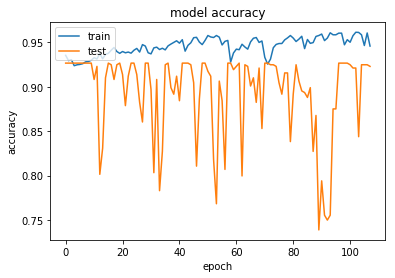

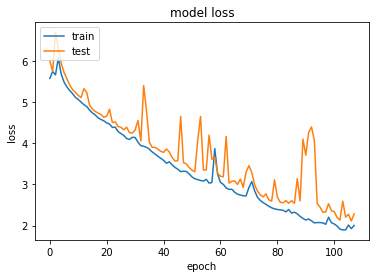

In [0]:
import matplotlib.pyplot as plt
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [0]:
score = model.evaluate(Xtest, Ytest, batch_size=batch_size, verbose=1)
score1 = model.evaluate(Xtrain, Ytrain, batch_size=batch_size, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
print('Train loss:', score1[0])
print('Train accuracy:', score1[1])

5351/5351 [==============================] - 0s 90us/step
Test loss: 0.5388383113863223
Test accuracy: 0.8658440957828913
Train loss: 0.428682910317774
Train accuracy: 0.9225565346016703


In [0]:
model.save('SA.h5')

In [0]:
from keras.utils import plot_model
plot_model(model, to_file='model.png')